In [1]:
import json
import pandas as pd

# === Load data ===
with open("C:/Users/theya/Downloads/qa_evaluation.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# === Core Metrics ===
total_questions = len(df)
exact_match_count = (df["answer"] == df["answer_response"]).sum()
not_mentioned_count = (df["answer_response"] == "Not mentioned in the text.").sum()

avg_bleu = df["bleu"].mean()
avg_rouge = df["rouge"].mean()
avg_cosine = df["cosine"].mean()

high_similarity_count = (df["cosine"] >= 0.9).sum()
medium_similarity_count = ((df["cosine"] >= 0.5) & (df["cosine"] < 0.9)).sum()
low_similarity_count = (df["cosine"] < 0.5).sum()

# === Print Deck-Friendly Summary ===
print("📊 Evaluation Summary")
print(f"Total Questions: {total_questions}")
print(f"Exact Matches (response == reference): {exact_match_count}")
print(f"'Not mentioned in the text' responses: {not_mentioned_count}")
print()
print("🔍 Similarity Metrics (average over all questions):")
print(f"BLEU Score: {avg_bleu:.3f}")
print(f"ROUGE-L Score: {avg_rouge:.3f}")
print(f"Cosine Similarity: {avg_cosine:.3f}")
print()
print("🎯 Cosine Similarity Distribution:")
print(f"High (≥ 0.9): {high_similarity_count}")
print(f"Medium (0.5–0.9): {medium_similarity_count}")
print(f"Low (< 0.5): {low_similarity_count}")


📊 Evaluation Summary
Total Questions: 2527
Exact Matches (response == reference): 280
'Not mentioned in the text' responses: 646

🔍 Similarity Metrics (average over all questions):
BLEU Score: 0.267
ROUGE-L Score: 0.438
Cosine Similarity: 0.609

🎯 Cosine Similarity Distribution:
High (≥ 0.9): 794
Medium (0.5–0.9): 893
Low (< 0.5): 840


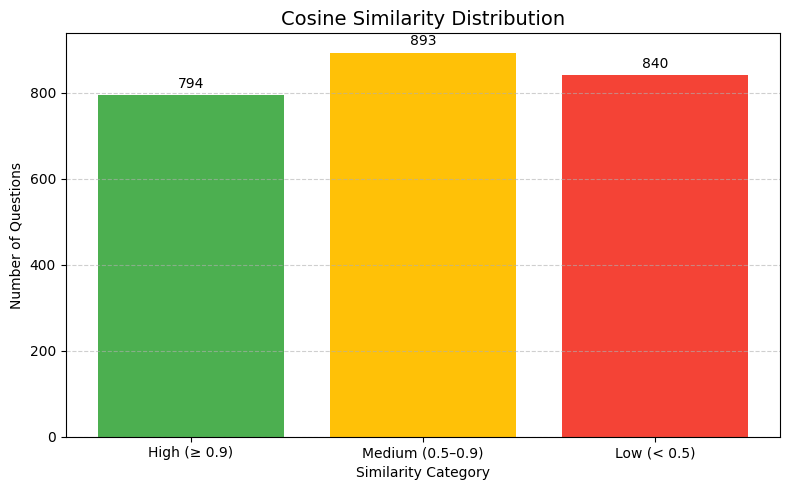

In [2]:
import matplotlib.pyplot as plt

# === Data ===
labels = ["High (≥ 0.9)", "Medium (0.5–0.9)", "Low (< 0.5)"]
counts = [794, 893, 840]
colors = ['#4CAF50', '#FFC107', '#F44336']  # green, amber, red

# === Plot ===
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, counts, color=colors)
plt.title("Cosine Similarity Distribution", fontsize=14)
plt.ylabel("Number of Questions")
plt.xlabel("Similarity Category")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# === Add value labels on bars ===
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 10, f'{height}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
